# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

# Import data

In [2]:
appdata = pd.read_csv('D:\\application_data.csv')


prev = pd.read_csv('D:\\previous_application.csv')

In [6]:
prev['CODE_REJECT_REASON'].unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

### Columns common to both the data sheets

In [3]:
a = list(appdata.columns)
b = list(prev.columns)
match = []
for x in a:
    if x in b:
        match.append(x)
for x in match:
    print(x)

SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START


# Historical Data Sheet

#### LOAN DECISION FOR DIFFERENT CONTRACT TYPES 

In [4]:
data1 = prev.groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE'])['SK_ID_CURR'].count().unstack().rename_axis(None)
data1.fillna(0, inplace=True)
data1

NAME_CONTRACT_TYPE,Cash loans,Consumer loans,Revolving loans,XNA
Approved,312540.0,626470.0,97771.0,0.0
Canceled,268591.0,1559.0,45854.0,315.0
Refused,165928.0,75185.0,49534.0,31.0
Unused offer,494.0,25937.0,5.0,0.0


<Figure size 720x432 with 0 Axes>

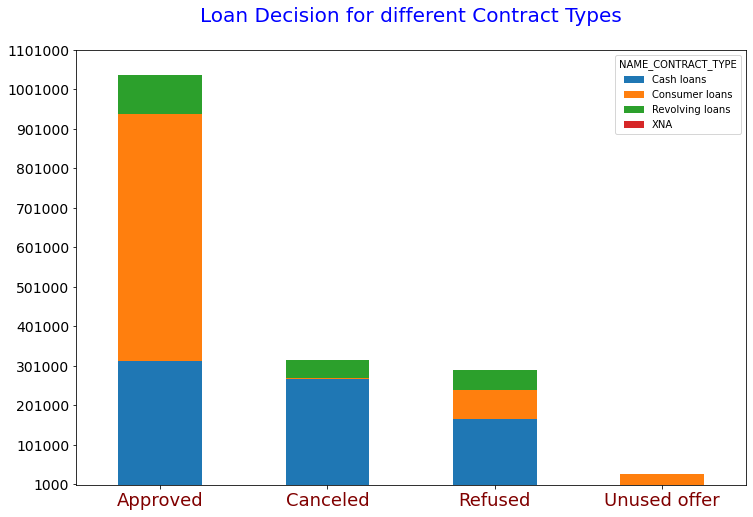

In [39]:
plt.figure(figsize=(10,6))
data1.plot.bar(stacked=True, figsize=(12, 8))

# Adding and formatting title
plt.title("Loan Decision for different Contract Types\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xticks(rotation=360, fontsize=18, color='maroon')
plt.yticks(fontsize=14)


ticks = np.arange(1000,1200000,100000)
labels = [i for i in ticks]
plt.yticks(ticks, labels);


#### LOAN DECISION FOR DIFFERENT CONTRACT TYPES 

In [6]:
prev['NAME_SELLER_INDUSTRY'].unique()

array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

#### LOAN DECISION FOR DIFFERENT INDUSTRY TYPES 

1- By Values 

In [61]:
data2 = prev.groupby(['NAME_CONTRACT_STATUS','NAME_SELLER_INDUSTRY'])['SK_ID_CURR'].count().unstack().rename_axis(None)
data2.fillna(0, inplace=True)
data2.drop('XNA', axis =1, inplace=True)
data2 


NAME_SELLER_INDUSTRY,Auto technology,Clothing,Connectivity,Construction,Consumer electronics,Furniture,Industry,Jewelry,MLM partners,Tourism
Approved,4515.0,21611.0,216284.0,26618.0,345194.0,51706.0,17177.0,2465.0,797.0,452.0
Canceled,2.0,1.0,1650.0,11.0,248.0,286.0,50.0,1.0,209.0,0.0
Refused,468.0,2265.0,35902.0,3076.0,49510.0,5646.0,1910.0,243.0,208.0,61.0
Unused offer,5.0,72.0,22193.0,76.0,3313.0,211.0,57.0,0.0,1.0,0.0
Total,4990.0,23949.0,276029.0,29781.0,398265.0,57849.0,19194.0,2709.0,1215.0,513.0


2- by Percentage

In [63]:
totalcol = data2.sum(axis=0)
totalcol.name = 'Total'
# Assign sum of all rows of DataFrame as a new Row
df = data2.append(totalcol.transpose())

df.sum(axis=1)

bypercentage = df
for i in range(len(bypercentage.columns)):
    bypercentage.iloc[:,i] = round(bypercentage.iloc[:,i]/bypercentage.iloc[4,i],2)*100

bypercentage.drop('Total', inplace=True)
bypercentage

NAME_SELLER_INDUSTRY,Auto technology,Clothing,Connectivity,Construction,Consumer electronics,Furniture,Industry,Jewelry,MLM partners,Tourism
Approved,90.0,90.0,78.0,89.0,87.0,89.0,89.0,91.0,66.0,88.0
Canceled,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
Refused,9.0,9.0,13.0,10.0,12.0,10.0,10.0,9.0,17.0,12.0
Unused offer,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Figure size 720x432 with 0 Axes>

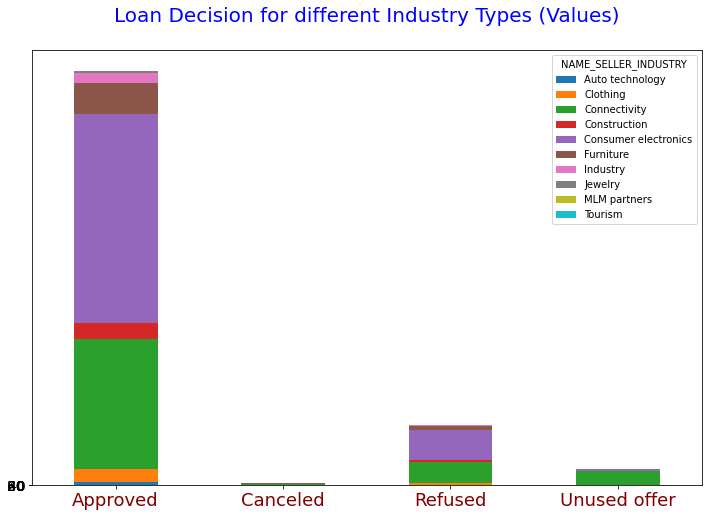

In [64]:
plt.figure(figsize=(10,6))
data2.plot.bar(stacked=True, figsize=(12, 8))

# Adding and formatting title
plt.title("Loan Decision for different Industry Types (Values)\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xticks(rotation=360, fontsize=18, color='maroon')
plt.yticks(fontsize=14);


ticks = np.arange(0,100,20)
labels = [i for i in ticks]
plt.yticks(ticks, labels);


In [72]:
data2

NAME_SELLER_INDUSTRY,Auto technology,Clothing,Connectivity,Construction,Consumer electronics,Furniture,Industry,Jewelry,MLM partners,Tourism
Approved,4515.0,21611.0,216284.0,26618.0,345194.0,51706.0,17177.0,2465.0,797.0,452.0
Canceled,2.0,1.0,1650.0,11.0,248.0,286.0,50.0,1.0,209.0,0.0
Refused,468.0,2265.0,35902.0,3076.0,49510.0,5646.0,1910.0,243.0,208.0,61.0
Unused offer,5.0,72.0,22193.0,76.0,3313.0,211.0,57.0,0.0,1.0,0.0


In [ ]:
explode = (0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [8,8])

plt.pie(y_vals, explode=explode, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

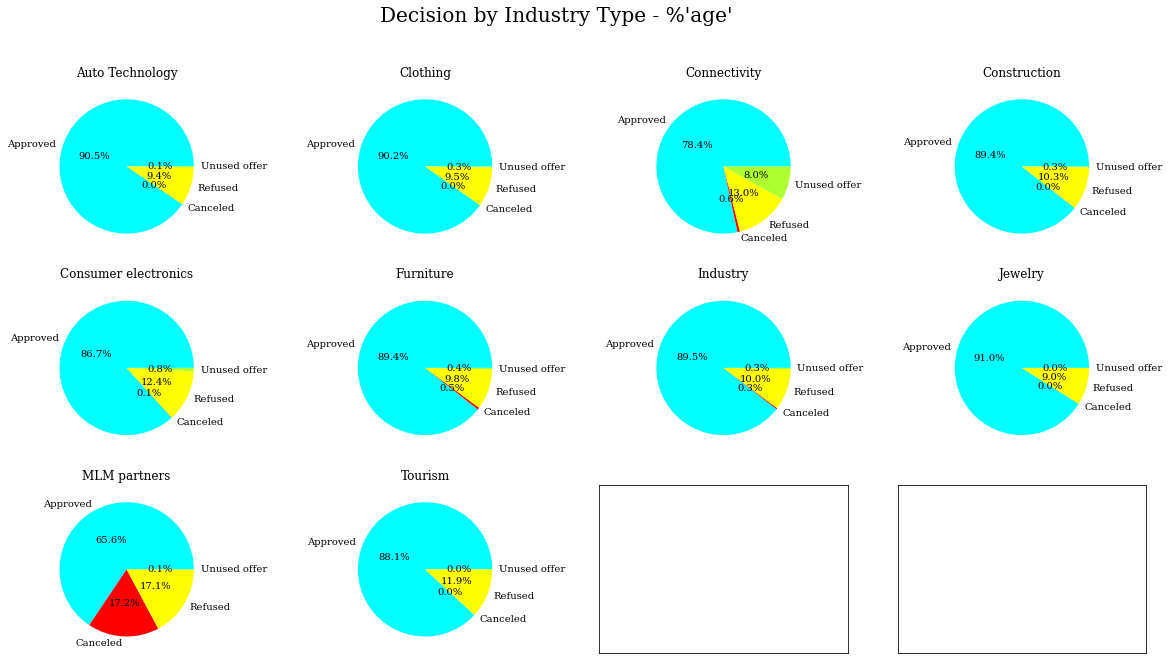

In [106]:

fig,a =  plt.subplots(nrows =3, ncols=4, sharey=True, sharex=True)
fig.suptitle("Decision by Industry Type - %'age'", fontsize=20)
plt.rcParams["font.family"] = "serif"

colors = ['#00FFFF', '#FF0000', '#FFFF00','#ADFF2F']

# explosion is used to separate out each slice of the doughnut (the white space in between)
#explode = (0.0, 0.0, 0.3, 0.0)



#1- Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Auto technology'])
#Color mapped to each value
a[0][0].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[0][0].set_title('Auto Technology')



#2- Plot for Clothing
idx = list(data2.index)
#Data
Auto =list(data2['Clothing'])
#Color mapped to each value
a[0][1].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[0][1].set_title('Clothing')



#Plot for Connectivity
idx = list(data2.index)
#Data
Auto =list(data2['Connectivity'])
#Color mapped to each value
a[0][2].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[0][2].set_title('Connectivity')


#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Construction'])
#Color mapped to each value
a[0][3].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[0][3].set_title('Construction')


#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Consumer electronics'])
#Color mapped to each value
a[1][0].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[1][0].set_title('Consumer electronics')

#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Furniture'])
#Color mapped to each value
a[1][1].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[1][1].set_title('Furniture')

#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Industry'])
#Color mapped to each value
a[1][2].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[1][2].set_title('Industry')

#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Jewelry'])
#Color mapped to each value
a[1][3].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[1][3].set_title('Jewelry')

#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['MLM partners'])
#Color mapped to each value
a[2][0].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[2][0].set_title('MLM partners')

#Plot for Auto Technology
idx = list(data2.index)
#Data
Auto =list(data2['Tourism'])
#Color mapped to each value
a[2][1].pie(Auto, colors=colors, labels=idx,autopct='%1.1f%%', pctdistance=0.5,explode=explode)
a[2][1].set_title('Tourism')


#set the size
fig.set_size_inches(20.5, 10.5, forward=True)


#### LOAN DECISION FOR DIFFERENT YIELD GROUPS 

In [73]:
data3 = prev.groupby(['NAME_CONTRACT_STATUS','NAME_YIELD_GROUP'])['SK_ID_CURR'].count().unstack().rename_axis(None)
data3.fillna(0, inplace=True)
data3.drop('XNA', axis=1,inplace=True)
data3

totalcoll = data3.sum(axis=0)
totalcoll.name = 'Total'
# Assign sum of all rows of DataFrame as a new Row
df1 = data3.append(totalcoll.transpose())
df1

NAME_YIELD_GROUP,high,low_action,low_normal,middle
Approved,299018.0,70876.0,246076.0,323036.0
Canceled,998.0,961.0,4828.0,3254.0
Refused,53243.0,20204.0,70538.0,59057.0
Unused offer,72.0,0.0,653.0,185.0
Total,353331.0,92041.0,322095.0,385532.0


<Figure size 720x432 with 0 Axes>

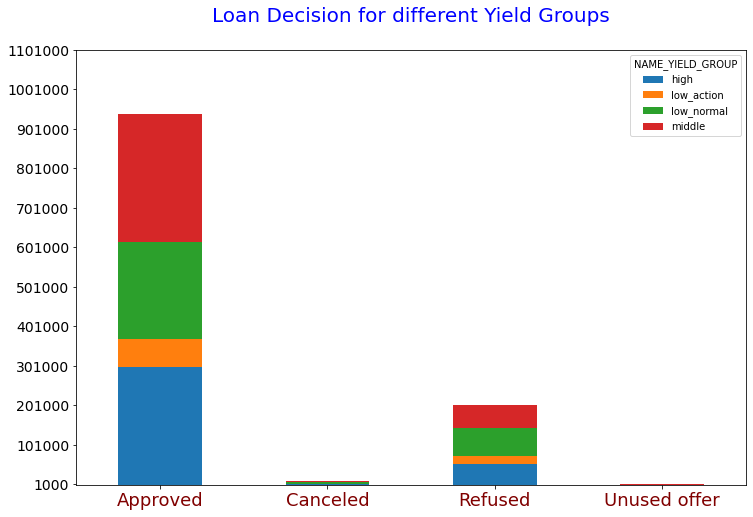

In [74]:
plt.figure(figsize=(10,6))
data3.plot.bar(stacked=True, figsize=(12, 8))

# Adding and formatting title
plt.title("Loan Decision for different Yield Groups\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xticks(rotation=360, fontsize=18, color='maroon')
plt.yticks(fontsize=14)


ticks = np.arange(1000,1200000,100000)
labels = [i for i in ticks]
plt.yticks(ticks, labels);

In [88]:
data = prev.groupby(['NAME_CONTRACT_STATUS','NAME_YIELD_GROUP','NAME_SELLER_INDUSTRY','NAME_CONTRACT_TYPE'])['SK_ID_CURR'].count()
print(data)

NAME_CONTRACT_STATUS  NAME_YIELD_GROUP  NAME_SELLER_INDUSTRY  NAME_CONTRACT_TYPE
Approved              XNA               Auto technology       Revolving loans         102
                                        Clothing              Revolving loans         345
                                        Connectivity          Revolving loans        8452
                                        Construction          Revolving loans         243
                                        Consumer electronics  Revolving loans       17703
                                                                                    ...  
Unused offer          XNA               XNA                   Consumer loans           14
                                                              Revolving loans           5
                      high              Connectivity          Consumer loans           72
                      low_normal        Connectivity          Consumer loans          653
                   